0 Cost= 121.9951629891645
500 Cost= 120.98308353678135
1000 Cost= 120.63286436829924
1500 Cost= 120.50796664274594
2000 Cost= 120.45738769682907
2500 Cost= 120.44159697549746
3000 Cost= 120.43646959276896
3500 Cost= 120.43407961543029
4000 Cost= 120.43249197292522
4500 Cost= 120.43198084969163
weight parameters:  [0.     0.     0.1135]
cost: 120.43192123480159
training mse(normalised): 0.9847636271122218
mse for test and predicted output: [47.47171333]


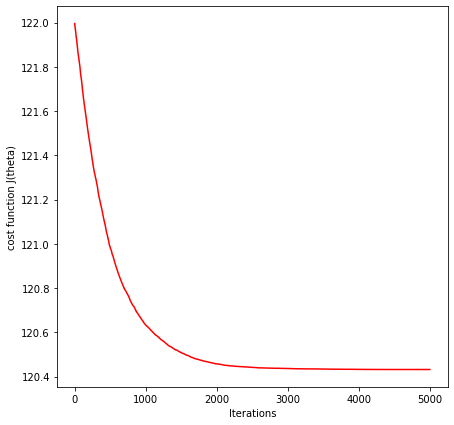

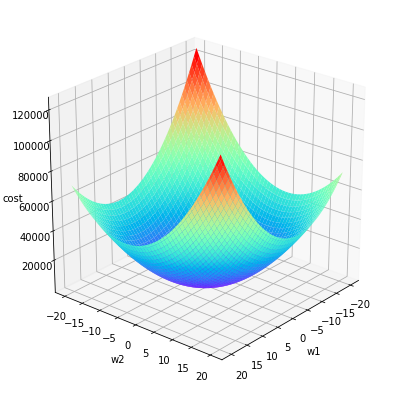

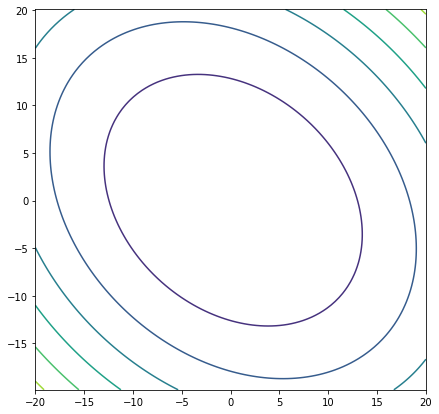

<Figure size 504x504 with 0 Axes>

In [5]:
##4 cells
##1. Stochastic gradient descent

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
plt.rcParams['figure.figsize'] = (7.0, 7.0)

def upload_data(file_name):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  y = data.iloc[:,-1]
  mean1 = x1.mean()
  mean2 = x2.mean()
  mean3 = y.mean()
  std1 = x1.std()
  std2 = x2.std()
  std3 = y.std()
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  y = (y-mean3)/std3

  X = np.column_stack((x1,x2))
  X = np.column_stack((np.ones(len(x1)),X))
  X = np.array(X)
  Y= np.array(y)
  return X,Y, mean1, mean2, mean3, std1, std2, std3

def upload_input(file_name, mean1, mean2, std1, std2):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  X1 = np.column_stack((x1,x2))
  X1 = np.column_stack((np.ones(len(x1)),X1))
  X1 = np.array(X1)
  return X1

def upload_output(file_name):
  data = pd.read_excel(file_name, header=None)
  Y1 = np.array(data)
  return Y1

class LinearRegression(object):

  def __init__(self, alpha, iterations):
    self.alpha = alpha
    self.iterations = iterations

  def calc_costfunc(self, X, Y, theta):
    m = X.shape[0]
    n = X.shape[1]
    cost = 0.0
    for i in range(m):
      x = X[i]
      h = 0.0
      for j in range(n):
        h += theta[j] * x[j]
      error = h - Y[i]
      cost += error**2

    cost = cost/(2.0)
    return cost


  def stochastic_grad_descent(self, X, Y):
    m = X.shape[0]
    n = X.shape[1]
    self.cost = np.zeros(self.iterations)
    self.theta = np.zeros(X.shape[1])
    self.mse = 0.0
    for iteration in range(self.iterations):
      temp = self.theta
      gradient = np.zeros(n)
      for i in range(m):
        rand_ind = np.random.randint(0,m)           #since sgd is mbgd with m*=1
        x = X[rand_ind]
        h = 0.0
        error = 0.0
        for j in range(n):
          h += self.theta[j] * x[j]
        error = h - Y[rand_ind] 
        self.mse += (error**2)*(1.0/m)
        gradient[j] = error * x[j]
        for j in range (n):
          temp[j] = self.theta[j] - self.alpha * gradient[j] * (1.0/m)
      self.theta = temp
      self.cost[iteration] = self.calc_costfunc(X, Y, self.theta)
      if iteration%500 == 0: 
        print(iteration, "Cost=", self.cost[iteration])    
    self.mse = self.mse * (1.0/self.iterations)

    return self

  def predict(self, X1, Y1, mean3, std3, theta1):
    m = X1.shape[0]
    n = X1.shape[1]
    Y_predicted = np.zeros(X1.shape[0])
    mse1 = 0.0
    for i in range(m):
        x = X1[i]
        h = 0.0
        for j in range(n):
          h += theta1[j] * x[j]
        Y_predicted[i] = h

    Y_predicted = (Y_predicted*std3) + mean3 
    Y_predicted = np.array(Y_predicted)
    for i in range(m):
        error = Y_predicted[i] - Y1[i]
        mse1 += (error**2)

    mse1 = mse1 * (1.0/m)
    return mse1, Y_predicted

  def plot_results(self, X, Y):

      #plotting cost function J vs no. of iterationsplt.subplot(1,1,1)
      plt.plot(np.arange(1, self.iterations+1), self.cost, 'r-')
      plt.xlabel('Iterations')
      plt.ylabel('cost function J(theta)')

      #plotting cost function vs w1 and w2 as a 3D graph
      ms = np.linspace(self.theta[1] - 20, self.theta[1] + 20, 100)
      bs = np.linspace(self.theta[2] - 20, self.theta[2] + 20, 100)
      Xs, Ys = np.meshgrid(ms, bs)
      Zs = np.array([self.calc_costfunc(X, Y, [1,w1,w2])
              for w1, w2 in zip(np.ravel(Xs), np.ravel(Ys))])
      Zs = np.reshape(Zs, Xs.shape)

      fig = plt.figure(figsize = (7,7))
      ax = fig.gca(projection = "3d")
      ax.set_xlabel(r'w1')
      ax.set_ylabel(r'w2')
      ax.set_zlabel(r'cost')
      ax.view_init(elev = 25, azim = 40)
      ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

      #plotting cost function vs w1 and w2 as a contour plot
      ax = plt.figure().gca()
      fig = plt.figure(figsize=(7,7))
      ax.plot(self.theta[1], self.theta[2], "b-")
      ax.contour(Xs, Ys, Zs)

def main():
  ##upload the .xlsx file with features and outputs and enter the name below
  training_file_name = 'training_feature_matrix.xlsx'
  X, Y, mean1, mean2, mean3, std1, std2, std3 = upload_data(training_file_name)
  test_input_file_name = 'test_feature_matrix.xlsx'
  X1 = upload_input(test_input_file_name, mean1, mean2, std1, std2)
  test_output_file_name = 'test_output_vector.xlsx'
  Y1 = upload_output(test_output_file_name)
  alpha = 0

  model = LinearRegression(alpha=0.001, iterations=5000).stochastic_grad_descent(X,Y)
  print("weight parameters: ",np.round(model.theta, decimals=4))
  print("cost:", model.cost[-1])
  print("training mse(normalised):", model.mse)
  model.plot_results(X,Y)

  mse1, Y_predicted = LinearRegression(alpha=0.001, iterations=5000).predict(X1,Y1,mean3, std3, model.theta)
  print("mse for test and predicted output:", mse1)

main()

0 Cost= 37223.79221798692
500 Cost= 37206.769429177744
1000 Cost= 37202.29076749425
1500 Cost= 37199.33367181395
2000 Cost= 37198.252958805475
2500 Cost= 37198.10426453371
3000 Cost= 37198.14866543589
3500 Cost= 37198.1443994125
4000 Cost= 37198.20487118968
4500 Cost= 37198.28733568101
weight parameters:  [0.     0.     0.4445]
cost: 37198.11561858899
training mse(normalised): 303.6371937333207
mse for test and predicted output: [110.66669119]


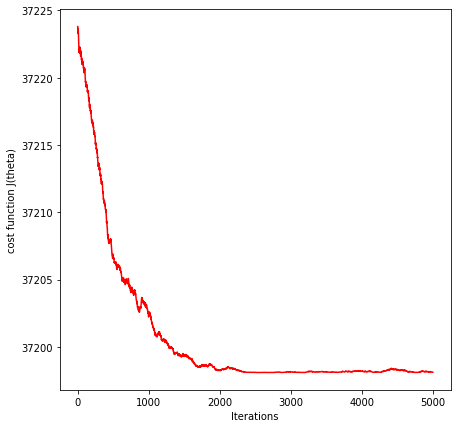

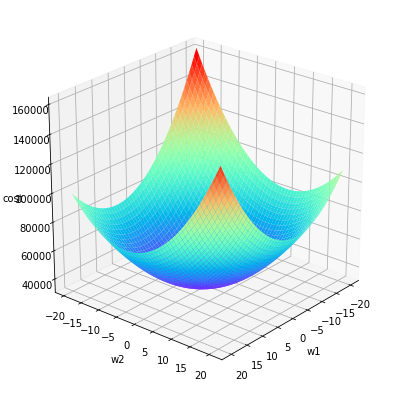

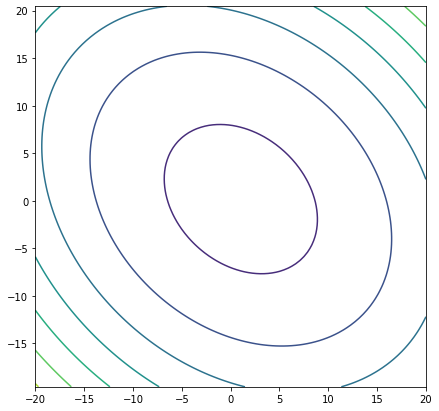

<Figure size 504x504 with 0 Axes>

In [ ]:
#2.Stochastic gradient descent without normalizing training output (to not lose information due to truncation)
#to see the change in the cost vs iterations graph although it will give higher values for cost and mse

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
plt.rcParams['figure.figsize'] = (7.0, 7.0)

def upload_data(file_name):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  y = data.iloc[:,-1]
  mean1 = x1.mean()
  mean2 = x2.mean()
  mean3 = y.mean()
  std1 = x1.std()
  std2 = x2.std()
  std3 = y.std()
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  #y = (y-mean3)/std3

  X = np.column_stack((x1,x2))
  X = np.column_stack((np.ones(len(x1)),X))
  X = np.array(X)
  Y= np.array(y)
  return X,Y, mean1, mean2, mean3, std1, std2, std3

def upload_input(file_name, mean1, mean2, std1, std2):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  X1 = np.column_stack((x1,x2))
  X1 = np.column_stack((np.ones(len(x1)),X1))
  X1 = np.array(X1)
  return X1

def upload_output(file_name):
  data = pd.read_excel(file_name, header=None)
  Y1 = np.array(data)
  return Y1

class LinearRegression(object):

  def __init__(self, alpha, iterations):
    self.alpha = alpha
    self.iterations = iterations

  def calc_costfunc(self, X, Y, theta):
    m = X.shape[0]
    n = X.shape[1]
    cost = 0.0
    for i in range(m):
      x = X[i]
      h = 0.0
      for j in range(n):
        h += theta[j] * x[j]
      error = h - Y[i]
      cost += error**2

    cost = cost/(2.0)
    return cost


  def stochastic_grad_descent(self, X, Y):
    m = X.shape[0]
    n = X.shape[1]
    self.cost = np.zeros(self.iterations)
    self.theta = np.zeros(X.shape[1])
    self.mse = 0.0
    for iteration in range(self.iterations):
      temp = self.theta
      gradient = np.zeros(n)
      for i in range(m):
        rand_ind = np.random.randint(0,m)           #since sgd is mbgd with m*=1
        x = X[rand_ind]
        h = 0.0
        error = 0.0
        for j in range(n):
          h += self.theta[j] * x[j]
        error = h - Y[rand_ind] 
        self.mse += (error**2)*(1.0/m)
        gradient[j] = error * x[j]
        for j in range (n):
          temp[j] = self.theta[j] - self.alpha * gradient[j] * (1.0/m)
      self.theta = temp
      self.cost[iteration] = self.calc_costfunc(X, Y, self.theta)
      if iteration%500 == 0: 
        print(iteration, "Cost=", self.cost[iteration])    
    self.mse = self.mse * (1.0/self.iterations)

    return self

  def predict(self, X1, Y1, mean3, std3, theta1):
    m = X1.shape[0]
    n = X1.shape[1]
    Y_predicted = np.zeros(X1.shape[0])
    mse1 = 0.0
    for i in range(m):
        x = X1[i]
        h = 0.0
        for j in range(n):
          h += theta1[j] * x[j]
        Y_predicted[i] = h

    #Y_predicted = (Y_predicted*std3) + mean3 
    #Y_predicted = np.array(Y_predicted)
    for i in range(m):
        error = Y_predicted[i] - Y1[i]
        mse1 += (error**2)

    mse1 = mse1 * (1.0/m)
    return mse1, Y_predicted

  def plot_results(self, X, Y):

      #plotting cost function J vs no. of iterationsplt.subplot(1,1,1)
      plt.plot(np.arange(1, self.iterations+1), self.cost, 'r-')
      plt.xlabel('Iterations')
      plt.ylabel('cost function J(theta)')

      #plotting cost function vs w1 and w2 as a 3D graph
      ms = np.linspace(self.theta[1] - 20, self.theta[1] + 20, 100)
      bs = np.linspace(self.theta[2] - 20, self.theta[2] + 20, 100)
      Xs, Ys = np.meshgrid(ms, bs)
      Zs = np.array([self.calc_costfunc(X, Y, [1,w1,w2])
              for w1, w2 in zip(np.ravel(Xs), np.ravel(Ys))])
      Zs = np.reshape(Zs, Xs.shape)

      fig = plt.figure(figsize = (7,7))
      ax = fig.gca(projection = "3d")
      ax.set_xlabel(r'w1')
      ax.set_ylabel(r'w2')
      ax.set_zlabel(r'cost')
      ax.view_init(elev = 25, azim = 40)
      ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

      #plotting cost function vs w1 and w2 as a contour plot
      ax = plt.figure().gca()
      fig = plt.figure(figsize=(7,7))
      ax.plot(self.theta[1], self.theta[2], "b-")
      ax.contour(Xs, Ys, Zs)

def main():
  ##upload the .xlsx file with features and outputs and enter the name below
  training_file_name = 'training_feature_matrix.xlsx'
  X, Y, mean1, mean2, mean3, std1, std2, std3 = upload_data(training_file_name)
  test_input_file_name = 'test_feature_matrix.xlsx'
  X1 = upload_input(test_input_file_name, mean1, mean2, std1, std2)
  test_output_file_name = 'test_output_vector.xlsx'
  Y1 = upload_output(test_output_file_name)
  alpha = 0

  model = LinearRegression(alpha=0.001, iterations=5000).stochastic_grad_descent(X,Y)
  print("weight parameters: ",np.round(model.theta, decimals=4))
  print("cost:", model.cost[-1])
  print("training mse(normalised):", model.mse)
  model.plot_results(X,Y)

  mse1, Y_predicted = LinearRegression(alpha=0.001, iterations=5000).predict(X1,Y1,mean3, std3, model.theta)
  print("mse for test and predicted output:", mse1)

main()

0 Cost= 24.096310998616055
100 Cost= 21.183255237785257
200 Cost= 22.347674850817857
300 Cost= 20.01865276005248
400 Cost= 21.579052763627665
weight parameters: [0.00394346 0.26720022 0.04747032]
cost: 26.762839900996024
mse for test and predicted output: [40.05181588]


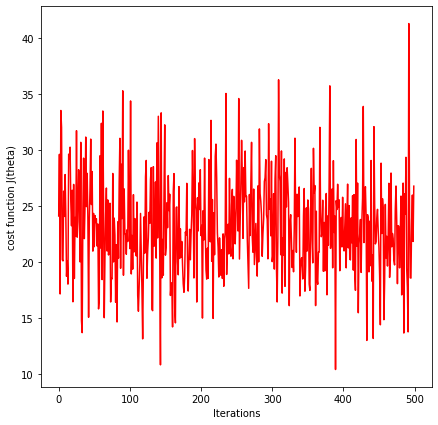

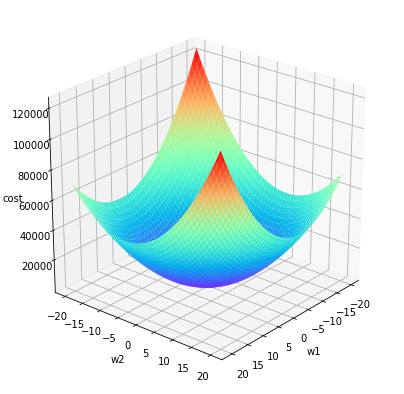

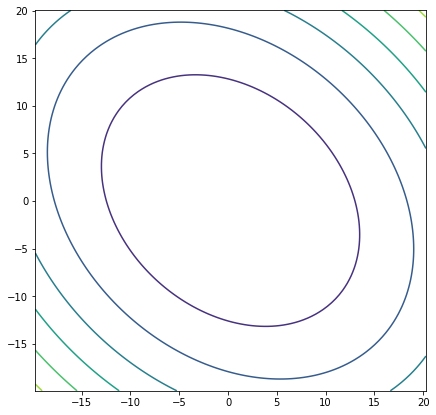

<Figure size 504x504 with 0 Axes>

In [ ]:
#3. Mini batch gradient descent for linear regression 
# Here, due to normalization of training output and a small batch size of 50 cumulative cost
#has low values so the effect is not visible in the cost vs iterations graph
#see cell 4 for the effect.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
plt.rcParams['figure.figsize'] = (7.0, 7.0)

def upload_data(file_name):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  y = data.iloc[:,-1]
  mean1 = x1.mean()
  mean2 = x2.mean()
  mean3 = y.mean()
  std1 = x1.std()
  std2 = x2.std()
  std3 = y.std()
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  y = (y-mean3)/std3

  X = np.column_stack((x1,x2))
  X = np.column_stack((np.ones(len(x1)),X))
  X = np.array(X)
  Y= np.array(y)
  return X,Y, mean1, mean2, mean3, std1, std2, std3

def upload_input(file_name, mean1, mean2, std1, std2):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  X1 = np.column_stack((x1,x2))
  X1 = np.column_stack((np.ones(len(x1)),X1))
  X1 = np.array(X1)
  return X1

def upload_output(file_name):
  data = pd.read_excel(file_name, header=None)
  Y1 = np.array(data)
  return Y1

class LinearRegression(object):

  def __init__(self, alpha, iterations):
    self.alpha = alpha
    self.iterations = iterations

  def calc_costfunc(self, X, Y, theta):
    m = X.shape[0]
    n = X.shape[1]
    cost = 0.0
    for i in range(m):
      x = X[i]
      h = 0.0
      for j in range(n):
        h += theta[j] * x[j]
      error = h - Y[i]
      cost += error**2

    cost = cost/(2.0)
    return cost

  def create_mini_batch(self, X, Y):
    data = np.column_stack((X, Y))
    data_sample = np.random.shuffle(data)
    X_mini = data[0:50, :-1]
    Y_mini = data[0:50,-1]
    return X_mini, Y_mini

  def minibatch_grad_descent(self, X, Y):
    m = X.shape[0]
    n = X.shape[1]
    self.cost = np.zeros(self.iterations)
    self.theta = np.zeros(X.shape[1])
    for iteration in range(self.iterations):
      X_mini, Y_mini = self.create_mini_batch(X, Y)
      m_mini = X_mini.shape[0]
      temp = self.theta
      gradient = np.zeros(n)
      for i in range(m_mini):
        x = X_mini[i]
        h = 0.0
        error = 0.0
        for j in range(n):
          h += self.theta[j] * x[j]
        error = h - Y_mini[i] 
        for j in range (n):
          gradient[j] += error * x[j]
      for j in range (n):
        temp[j] = self.theta[j] - self.alpha * gradient[j] * (1.0/m_mini)
      self.theta = temp
      self.cost[iteration] = self.calc_costfunc(X_mini, Y_mini, self.theta)
      
      if iteration%100 == 0: 
        print(iteration, "Cost=", self.cost[iteration]) 

    return self

  def predict(self, X1, Y1, mean3, std3, theta1):
    m = X1.shape[0]
    n = X1.shape[1]
    Y_predicted = np.zeros(X1.shape[0])
    mse1 = 0.0
    for i in range(m):
        x = X1[i]
        h = 0.0
        for j in range(n):
          h += theta1[j] * x[j]
        Y_predicted[i] = h

    Y_predicted = (Y_predicted*std3) + mean3 
    Y_predicted = np.array(Y_predicted)
    for i in range(m):
        error = Y_predicted[i] - Y1[i]
        mse1 += (error**2)

    mse1 = mse1 * (1.0/m)
    return mse1, Y_predicted

  def plot_results(self, X, Y):

      #plotting cost function J vs no. of iterationsplt.subplot(1,1,1)
      plt.plot(self.cost, 'r-')
      plt.xlabel('Iterations')
      plt.ylabel('cost function J(theta)')

      #plotting cost function vs w1 and w2 as a 3D graph
      ms = np.linspace(self.theta[1] - 20, self.theta[1] + 20, 100)
      bs = np.linspace(self.theta[2] - 20, self.theta[2] + 20, 100)
      Xs, Ys = np.meshgrid(ms, bs)
      Zs = np.array([self.calc_costfunc(X, Y, [1,w1,w2])
              for w1, w2 in zip(np.ravel(Xs), np.ravel(Ys))])
      Zs = np.reshape(Zs, Xs.shape)

      fig = plt.figure(figsize = (7,7))
      ax = fig.gca(projection = "3d")
      ax.set_xlabel(r'w1')
      ax.set_ylabel(r'w2')
      ax.set_zlabel(r'cost')
      ax.view_init(elev = 25, azim = 40)
      ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)
      
      #plotting cost function vs w1 and w2 as a contour plot
      ax = plt.figure().gca()
      fig = plt.figure(figsize=(7,7))
      ax.plot(self.theta[1], self.theta[2], "b-")
      ax.contour(Xs, Ys, Zs)

def main():
  ##upload the .xlsx file with features and outputs and enter the name below
  training_file_name = 'training_feature_matrix.xlsx'
  X, Y, mean1, mean2, mean3, std1, std2, std3 = upload_data(training_file_name)
  test_input_file_name = 'test_feature_matrix.xlsx'
  X1 = upload_input(test_input_file_name, mean1, mean2, std1, std2)
  test_output_file_name = 'test_output_vector.xlsx'
  Y1 = upload_output(test_output_file_name)
  alpha = 0

  model = LinearRegression(alpha=0.01, iterations=500).minibatch_grad_descent(X,Y)
  print("weight parameters:", model.theta)
  print("cost:", model.cost[-1])
  model.plot_results(X,Y)

  mse1, Y_predicted = LinearRegression(alpha=0.01, iterations=500).predict(X1,Y1,mean3, std3, model.theta)
  print("mse for test and predicted output:", mse1)

main()

0 Cost= 7117.915727940551
100 Cost= 1109.1212301286346
200 Cost= 551.3740434855639
300 Cost= 632.810495944513
400 Cost= 376.4485413865844
weight parameters: [16.85850399  1.05730866  0.19110446]
cost: 298.6901274659292
mse for test and predicted output: [38.78963286]


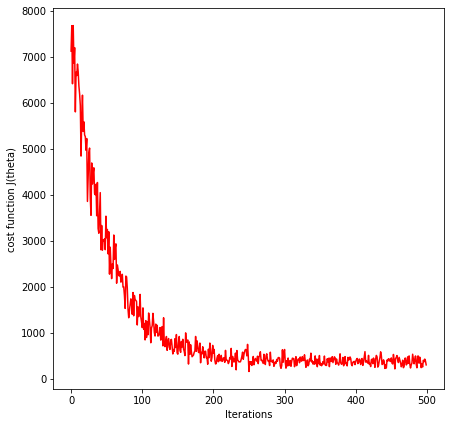

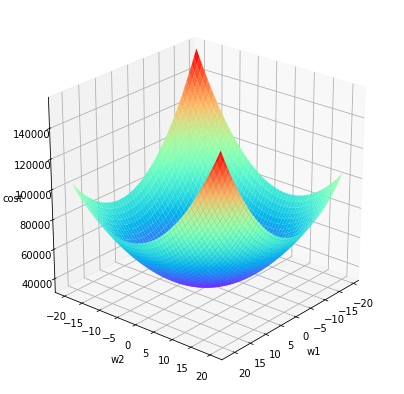

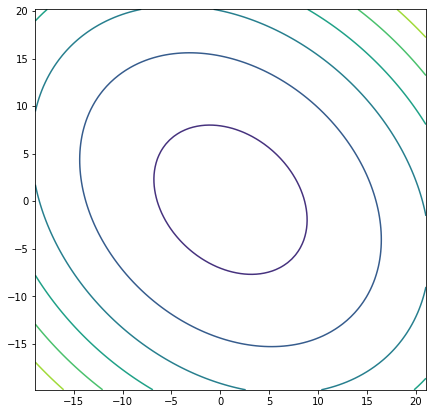

<Figure size 504x504 with 0 Axes>

In [ ]:
#4. Mini batch gradient descent without normalizing the training output
#the change in cost with iterations is clearly visible since cumulative cost values are not so low

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
plt.rcParams['figure.figsize'] = (7.0, 7.0)

def upload_data(file_name):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  y = data.iloc[:,-1]
  mean1 = x1.mean()
  mean2 = x2.mean()
  mean3 = y.mean()
  std1 = x1.std()
  std2 = x2.std()
  std3 = y.std()
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  #y = (y-mean3)/std3

  X = np.column_stack((x1,x2))
  X = np.column_stack((np.ones(len(x1)),X))
  X = np.array(X)
  Y= np.array(y)
  return X,Y, mean1, mean2, mean3, std1, std2, std3

def upload_input(file_name, mean1, mean2, std1, std2):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  X1 = np.column_stack((x1,x2))
  X1 = np.column_stack((np.ones(len(x1)),X1))
  X1 = np.array(X1)
  return X1

def upload_output(file_name):
  data = pd.read_excel(file_name, header=None)
  Y1 = np.array(data)
  return Y1

class LinearRegression(object):

  def __init__(self, alpha, iterations):
    self.alpha = alpha
    self.iterations = iterations

  def calc_costfunc(self, X, Y, theta):
    m = X.shape[0]
    n = X.shape[1]
    cost = 0.0
    for i in range(m):
      x = X[i]
      h = 0.0
      for j in range(n):
        h += theta[j] * x[j]
      error = h - Y[i]
      cost += error**2

    cost = cost/(2.0)
    return cost

  def create_mini_batch(self, X, Y):
    data = np.column_stack((X, Y))
    data_sample = np.random.shuffle(data)
    X_mini = data[0:50, :-1]
    Y_mini = data[0:50,-1]
    return X_mini, Y_mini

  def minibatch_grad_descent(self, X, Y):
    m = X.shape[0]
    n = X.shape[1]
    self.cost = np.zeros(self.iterations)
    self.theta = np.zeros(X.shape[1])
    for iteration in range(self.iterations):
      X_mini, Y_mini = self.create_mini_batch(X, Y)
      m_mini = X_mini.shape[0]
      temp = self.theta
      gradient = np.zeros(n)
      for i in range(m_mini):
        x = X_mini[i]
        h = 0.0
        error = 0.0
        for j in range(n):
          h += self.theta[j] * x[j]
        error = h - Y_mini[i] 
        for j in range (n):
          gradient[j] += error * x[j]
      for j in range (n):
        temp[j] = self.theta[j] - self.alpha * gradient[j] * (1.0/m_mini)
      self.theta = temp
      self.cost[iteration] = self.calc_costfunc(X_mini, Y_mini, self.theta)
      
      if iteration%100 == 0: 
        print(iteration, "Cost=", self.cost[iteration]) 

    return self

  def predict(self, X1, Y1, mean3, std3, theta1):
    m = X1.shape[0]
    n = X1.shape[1]
    Y_predicted = np.zeros(X1.shape[0])
    mse1 = 0.0
    for i in range(m):
        x = X1[i]
        h = 0.0
        for j in range(n):
          h += theta1[j] * x[j]
        Y_predicted[i] = h

    #Y_predicted = (Y_predicted*std3) + mean3 
    #Y_predicted = np.array(Y_predicted)
    for i in range(m):
        error = Y_predicted[i] - Y1[i]
        mse1 += (error**2)

    mse1 = mse1 * (1.0/m)
    return mse1, Y_predicted

  def plot_results(self, X, Y):

      #plotting cost function J vs no. of iterationsplt.subplot(1,1,1)
      plt.plot(self.cost, 'r-')
      plt.xlabel('Iterations')
      plt.ylabel('cost function J(theta)')

      #plotting cost function vs w1 and w2 as a 3D graph
      ms = np.linspace(self.theta[1] - 20, self.theta[1] + 20, 100)
      bs = np.linspace(self.theta[2] - 20, self.theta[2] + 20, 100)
      Xs, Ys = np.meshgrid(ms, bs)
      Zs = np.array([self.calc_costfunc(X, Y, [1,w1,w2])
              for w1, w2 in zip(np.ravel(Xs), np.ravel(Ys))])
      Zs = np.reshape(Zs, Xs.shape)

      fig = plt.figure(figsize = (7,7))
      ax = fig.gca(projection = "3d")
      ax.set_xlabel(r'w1')
      ax.set_ylabel(r'w2')
      ax.set_zlabel(r'cost')
      ax.view_init(elev = 25, azim = 40)
      ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)
      
      #plotting cost function vs w1 and w2 as a contour plot
      ax = plt.figure().gca()
      fig = plt.figure(figsize=(7,7))
      ax.plot(self.theta[1], self.theta[2], "b-")
      ax.contour(Xs, Ys, Zs)

def main():
  ##upload the .xlsx file with features and outputs and enter the name below
  training_file_name = 'training_feature_matrix.xlsx'
  X, Y, mean1, mean2, mean3, std1, std2, std3 = upload_data(training_file_name)
  test_input_file_name = 'test_feature_matrix.xlsx'
  X1 = upload_input(test_input_file_name, mean1, mean2, std1, std2)
  test_output_file_name = 'test_output_vector.xlsx'
  Y1 = upload_output(test_output_file_name)
  alpha = 0

  model = LinearRegression(alpha=0.01, iterations=500).minibatch_grad_descent(X,Y)
  print("weight parameters:", model.theta)
  print("cost:", model.cost[-1])
  model.plot_results(X,Y)

  mse1, Y_predicted = LinearRegression(alpha=0.01, iterations=500).predict(X1,Y1,mean3, std3, model.theta)
  print("mse for test and predicted output:", mse1)

main()